In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from collections import deque
import math


import seaborn as sns

In [10]:
sns.set_style("whitegrid")

# Imagenet100

In [11]:
probing_folders1 = [
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/imagenet100/scale/probing_joint/probing_ratio1', 'SCALE', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/imagenet100/simsiam/arp/probing_joint/probing_ratio1', 'ARP', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/imagenet100/simsiam/apre/probing_joint/probing_ratio1', 'APRE', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/imagenet100/simsiam/fifo_replay/probing_joint/probing_ratio1', 'ER w/ FIFO', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/imagenet100/simsiam/replay/probing_joint/probing_ratio1', 'ER /w reservoir', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/imagenet100/simsiam/minred/probing_joint/probing_ratio1', 'MinRed', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/imagenet100/simsiam/iid/probing_joint/probing_ratio1', 'i.i.d.', 'dotted'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/imagenet100/simsiam/cassle_r/probing_joint/probing_ratio1', 'CaSSLe-R', 'dashed'), 
]

probing_folders2 = [
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/imagenet100/scale/probing_joint/probing_ratio1', 'SCALE', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/imagenet100/simclr/arp/probing_joint/probing_ratio1', 'ARP', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/imagenet100/simclr/apre/probing_joint/probing_ratio1', 'APRE', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/imagenet100/simclr/fifo_replay/probing_joint/probing_ratio1', 'ER w/ FIFO', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/imagenet100/simclr/replay/probing_joint/probing_ratio1', 'ER /w reservoir', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/imagenet100/simclr/minred/probing_joint/probing_ratio1', 'MinRed', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/imagenet100/simclr/iid/probing_joint/probing_ratio1', 'i.i.d.', 'dotted'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/imagenet100/simclr/cassle_r/probing_joint/probing_ratio1', 'CaSSLe-R', 'dashed'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/imagenet100/osiris_r/probing_joint/probing_ratio1', 'Osiris-R', 'solid'),
]

probing_folders3 = [
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/imagenet100/simsiam/aep/probing_joint/probing_ratio1', 'AEP', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/imagenet100/simsiam/no_strategy/probing_joint/probing_ratio1', 'finetuning', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/imagenet100/simsiam/lump/probing_joint/probing_ratio1', 'LUMP', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/imagenet100/simsiam/iid_short/probing_joint/probing_ratio1', 'i.i.d.', 'dotted'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/imagenet100/simsiam/cassle/probing_joint/probing_ratio1', 'CaSSLe', 'dashed'), 
]

probing_folders4 = [
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/imagenet100/simclr/aep/probing_joint/probing_ratio1', 'AEP', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/imagenet100/simclr/no_strategy/probing_joint/probing_ratio1', 'finetuning', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/imagenet100/simclr/lump/probing_joint/probing_ratio1', 'LUMP', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/imagenet100/simclr/iid_short/probing_joint/probing_ratio1', 'i.i.d.', 'dotted'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/imagenet100/simclr/cassle/probing_joint/probing_ratio1', 'CaSSLe', 'dashed'), 
]


In [12]:
def create_plot(probing_folders, steps_per_experience, title):
    probe_dfs_list = []

    for probing_folder, name, linestyle in  probing_folders:
        probe_exp_df_list = [] # List of tuples (Dataframe, exp_index)

        # Read all csv, one for each experience on which propltbing has been executed
        for file in os.listdir(probing_folder):
                if file.endswith('.csv'):
                    probe_exp = int(file.split('.csv')[0].split('probe_exp_')[-1])
                    # print('expidx:', probe_exp)
                    df = pd.read_csv(os.path.join(probing_folder, file))
                    probe_exp_df_list.append((df, probe_exp))

        # Find df with highest exp_index in probe_exp_df_list
        final_df = max(probe_exp_df_list, key=lambda x: x[1])[0]

        # Sort by exp idx
        probe_dfs = [tup[0] for tup in sorted(probe_exp_df_list, key=lambda x: x[1])]
        # print(probe_dfs)
        probe_dfs_list.append((probe_dfs, name, linestyle))

    test_accs_list = []

    for probe_dfs, name, linestyle in probe_dfs_list:
        test_accs = []
        for df in probe_dfs:
            test_accs.append(df['test_acc'].iloc[-1])
        test_accs_list.append((test_accs, name, linestyle))

    for test_accs, name, linestyle in test_accs_list:
        sns.lineplot(test_accs, label=name, linestyle=linestyle)

    plt.legend(loc="upper left")

    xticks_labels = [f'{steps_per_experience*(x+1):.0f}k' for x in np.arange(0, len(test_accs_list[0][0]), step=2)]
    plt.xticks(np.arange(0, len(test_accs_list[0][0]), step=2), labels=xticks_labels)
    plt.xlabel('TR steps')
    plt.ylabel('Probing Accuracy')
    plt.title(title)


/home/giacomo/mambaforge/envs/cl_ssl/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/giacomo/mambaforge/envs/cl_ssl/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/giacomo/mambaforge/envs/cl_ssl/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/giacomo/mambaforge/envs/cl_ssl/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

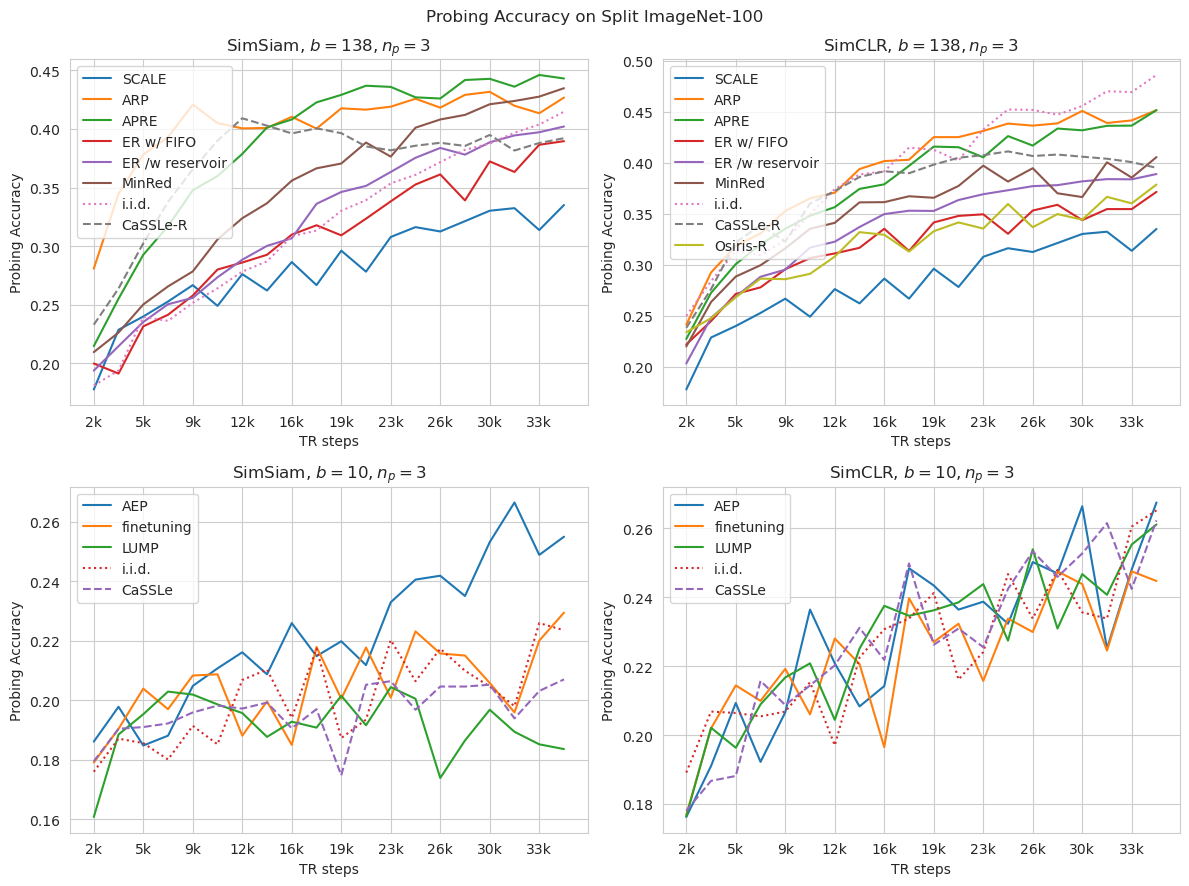

In [13]:
fig = plt.figure(figsize=(12, 9))

plt.subplot(2, 2, 1)
create_plot(probing_folders1, 1.755, 'SimSiam, $b=138, n_p=3$')

plt.subplot(2, 2, 2)
create_plot(probing_folders2, 1.755, 'SimCLR, $b=138, n_p=3$')

plt.subplot(2, 2, 3)
create_plot(probing_folders3, 1.755, 'SimSiam, $b=10, n_p=3$')

plt.subplot(2, 2, 4)
create_plot(probing_folders4, 1.755, 'SimCLR, $b=10, n_p=3$')
plt.suptitle('Probing Accuracy on Split ImageNet-100')

# plt.axvline(4.5, color='red')
plt.tight_layout()

plt.show()

# CIFAR-100

In [14]:
probing_folders1 = [
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/cifar100/scale/probing_joint/probing_ratio1', 'SCALE', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/cifar100/simsiam/arp/probing_joint/probing_ratio1', 'ARP', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/cifar100/simsiam/apre/probing_joint/probing_ratio1', 'APRE', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/cifar100/simsiam/fifo_replay/probing_joint/probing_ratio1', 'ER w/ FIFO', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/cifar100/simsiam/replay/probing_joint/probing_ratio1', 'ER /w reservoir', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/cifar100/simsiam/minred/probing_joint/probing_ratio1', 'MinRed', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/cifar100/simsiam/iid/probing_joint/probing_ratio1', 'i.i.d.', 'dotted'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/cifar100/simsiam/cassle_r/probing_joint/probing_ratio1', 'CaSSLe-R', 'dashed'), 
]

probing_folders2 = [
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/cifar100/scale/probing_joint/probing_ratio1', 'SCALE', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/cifar100/simclr/arp/probing_joint/probing_ratio1', 'ARP', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/cifar100/simclr/apre/probing_joint/probing_ratio1', 'APRE', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/cifar100/simclr/fifo_replay/probing_joint/probing_ratio1', 'ER w/ FIFO', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/cifar100/simclr/replay/probing_joint/probing_ratio1', 'ER /w reservoir', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/cifar100/simclr/minred/probing_joint/probing_ratio1', 'MinRed', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/cifar100/simclr/iid/probing_joint/probing_ratio1', 'i.i.d.', 'dotted'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/cifar100/simclr/cassle_r/probing_joint/probing_ratio1', 'CaSSLe-R', 'dashed'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/cifar100/osiris_r/probing_joint/probing_ratio1', 'Osiris-R', 'solid'),
]

probing_folders3 = [
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/cifar100/simsiam/aep/probing_joint/probing_ratio1', 'AEP', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/cifar100/simsiam/no_strategy/probing_joint/probing_ratio1', 'finetuning', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/cifar100/simsiam/lump/probing_joint/probing_ratio1', 'LUMP', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/cifar100/simsiam/iid_short/probing_joint/probing_ratio1', 'i.i.d.', 'dotted'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/cifar100/simsiam/cassle/probing_joint/probing_ratio1', 'CaSSLe', 'dashed'), 
]

probing_folders4 = [
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/cifar100/simclr/aep/probing_joint/probing_ratio1', 'AEP', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/cifar100/simclr/no_strategy/probing_joint/probing_ratio1', 'finetuning', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/cifar100/simclr/lump/probing_joint/probing_ratio1', 'LUMP', 'solid'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/cifar100/simclr/iid_short/probing_joint/probing_ratio1', 'i.i.d.', 'dotted'),
    ('/home/giacomo/Desktop/cl-ssl/ocl-ssl/results_np3_b138/cifar100/simclr/cassle/probing_joint/probing_ratio1', 'CaSSLe', 'dashed'), 
]


In [15]:
def create_plot(probing_folders, steps_per_experience, title):
    probe_dfs_list = []

    for probing_folder, name, linestyle in  probing_folders:
        probe_exp_df_list = [] # List of tuples (Dataframe, exp_index)

        # Read all csv, one for each experience on which propltbing has been executed
        for file in os.listdir(probing_folder):
                if file.endswith('.csv'):
                    probe_exp = int(file.split('.csv')[0].split('probe_exp_')[-1])
                    # print('expidx:', probe_exp)
                    df = pd.read_csv(os.path.join(probing_folder, file))
                    probe_exp_df_list.append((df, probe_exp))

        # Find df with highest exp_index in probe_exp_df_list
        final_df = max(probe_exp_df_list, key=lambda x: x[1])[0]

        # Sort by exp idx
        probe_dfs = [tup[0] for tup in sorted(probe_exp_df_list, key=lambda x: x[1])]
        # print(probe_dfs)
        probe_dfs_list.append((probe_dfs, name, linestyle))

    test_accs_list = []

    for probe_dfs, name, linestyle in probe_dfs_list:
        test_accs = []
        for df in probe_dfs:
            test_accs.append(df['test_acc'].iloc[-1])
        test_accs_list.append((test_accs, name, linestyle))

    for test_accs, name, linestyle in test_accs_list:
        sns.lineplot(test_accs, label=name, linestyle=linestyle)

    plt.legend(loc="upper left")

    xticks_labels = [f'{steps_per_experience*(x+1):.0f}k' for x in np.arange(0, len(test_accs_list[0][0]), step=2)]
    plt.xticks(np.arange(0, len(test_accs_list[0][0]), step=2), labels=xticks_labels)
    plt.xlabel('TR steps')
    plt.ylabel('Probing Accuracy')
    plt.title(title)


/home/giacomo/mambaforge/envs/cl_ssl/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/giacomo/mambaforge/envs/cl_ssl/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/giacomo/mambaforge/envs/cl_ssl/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/giacomo/mambaforge/envs/cl_ssl/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

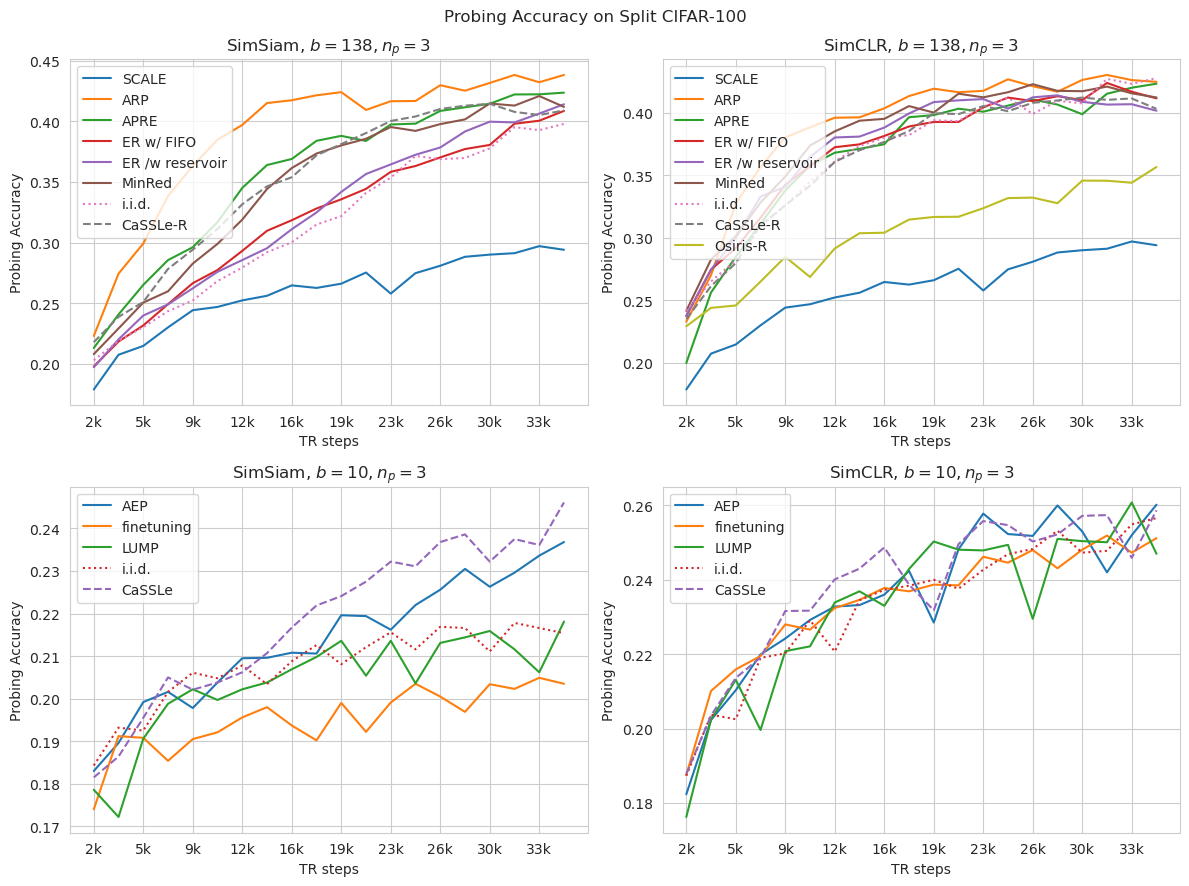

In [16]:
fig = plt.figure(figsize=(12, 9))

plt.subplot(2, 2, 1)
create_plot(probing_folders1, 1.755, 'SimSiam, $b=138, n_p=3$')

plt.subplot(2, 2, 2)
create_plot(probing_folders2, 1.755, 'SimCLR, $b=138, n_p=3$')

plt.subplot(2, 2, 3)
create_plot(probing_folders3, 1.755, 'SimSiam, $b=10, n_p=3$')

plt.subplot(2, 2, 4)
create_plot(probing_folders4, 1.755, 'SimCLR, $b=10, n_p=3$')
plt.suptitle('Probing Accuracy on Split CIFAR-100')

# plt.axvline(4.5, color='red')
plt.tight_layout()

plt.show()